# Assignment-2 (Activation Function)

An Activation Function is a mathematical operation used in neural networks to decide whether a neuron should be activated or not. It introduces non-linearity into the model, allowing it to learn and make more accurate predictions. There are different types of activation functions, such as the sigmoid, ReLU, and tanh functions, which depend on the problem being solved and the architecture of the neural network. In this notebook few types of activation function will be discused and implemented.

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
x = np.linspace(-5, 5, 50)

In [53]:
def plot_graph(y,title,ylabel,linetype='--'):
    plt.figure()
    plt.plot(x,y, linetype)
    plt.grid(True)
    plt.xlabel("X")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

# Step function

The step or threshold activation function is a simple activation function. It returns a binary output of 0 or 1 based on whether the input is above or below a certain threshold. However, it is rarely used in practice due to its discontinuous nature and inability to handle gradient-based optimization. 

$$
 f(x)=\begin{cases}
        1 & \text{ if } x>=0 \\
        0 & \text{ if } x<0 
        \end{cases}
$$
Here, `x` is the input to the function, and the threshold is set at `0`. If x is greater than or equal to `0`, the function outputs `1`, otherwise it outputs 0. This makes the function ideal for binary classification tasks, where the output of the neural network needs to be either a 0 or a 1.

Yet there are several downsides to using the step function. While gradient descent optimization is required for some neural network types, its lack of differentiability limits its applicability. In addition, other than whether the input is above or below the threshold, it does not reveal any information regarding the input's size.

The step function has certain shortcomings, but it can be beneficial in some contexts, especially when first training a neural network.

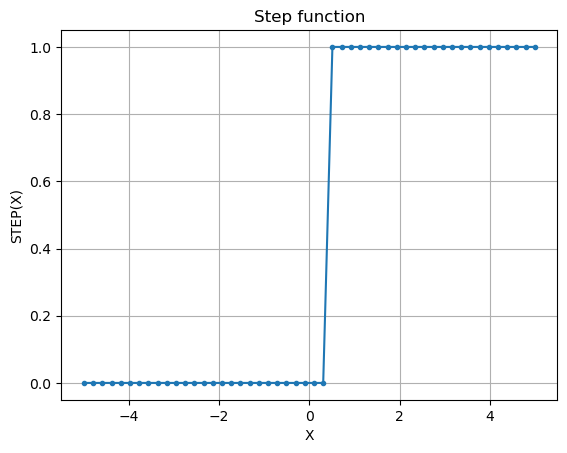

In [54]:
y = list(map(lambda n: 1 if n>0.5 else 0, x))
plot_graph(y,'Step function',"STEP(X)",'.-')

# Sigmoid 

A common non-linear function seen in ANNs is the sigmoid activation function. Any number may be used as an input and the output will always be a number between 0 and 1. This makes it useful for tasks where a probability or a certain range of numbers is required. The input range of (-,) is transformed by this function into the (0,1).
$$
\sigma(x) = \frac{1}{1+e^{-x}} 
$$

Here,`x` is the input to the function, and `e` represents the exponential function. The output of the sigmoid function is always between 0 and 1, and it is a smooth, continuous function that is differentiable, making it a good choice for optimization algorithms that rely on gradient descent.

The sigmoid function is also differentiable, which makes it useful for backpropagation during the training of neural networks. However, it can suffer from vanishing gradients when the input values are too large or too small, which can slow down the learning process.

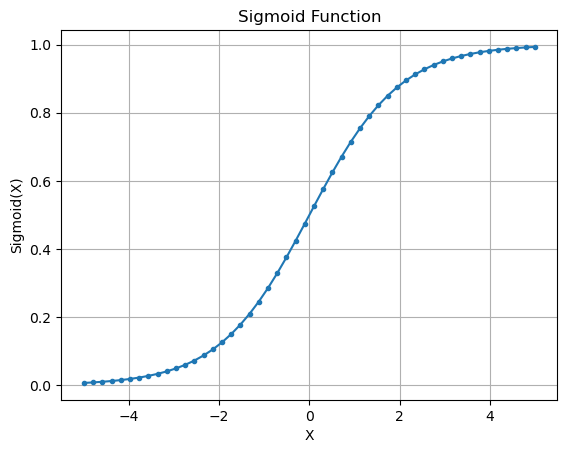

In [55]:
y = 1 / (1 + np.exp(-x))
plot_graph(y,"Sigmoid Function", "Sigmoid(X)",'.-')

# Tanh

The hyperbolic tangent (tanh) activation function is a popular choice in neural networks due to its ability to provide a smooth, non-linear mapping between inputs and outputs. The tanh function is similar to the sigmoid function in shape, but it maps values to the range [-1, 1] instead of [0, 1].


$$ 
\begin{split}
            tanh(x) & = \frac{e^x - e^{-x}}{e^x + e^{-x}} \\
                    & = \frac{e^{2x} - 1}{e^{2x} + 1}
\end{split}                  
$$
The tanh function has an advantage over the sigmoid function in that its output is centered around zero. When working with inputs that can take both positive and negative values, for example, this might be helpful. One other benefit of the tanh function is that its steeper gradients compared to the sigmoid function may assist the network in learning more intricate patterns. It may also make it more vulnerable to the vanishing gradient problem, in which training fails because gradients are too low. The tanh function, like any other activation function, isn't always the best option. Depending on the parameters of the situation at hand, different activation functions, such as the ReLU (rectified linear unit) function, may be more suited. Although there have been significant advancements in neural network technology, the tanh function is still commonly used in applications.

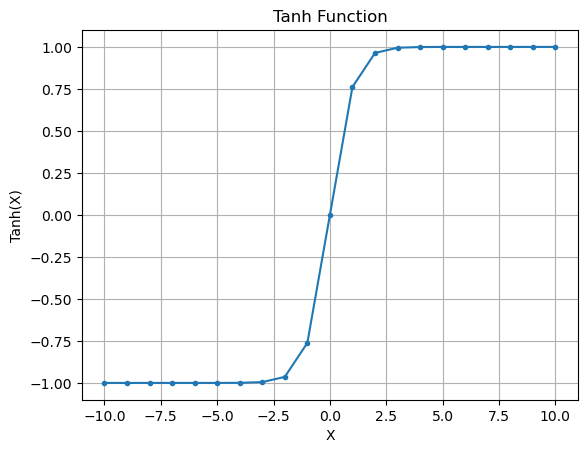

In [66]:
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plot_graph(y,'Tanh Function', "Tanh(X)",'.-')

# Rectified Linear Units (ReLU)

The rectified linear activation function, or ReLU is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 
$$ f(x) = max(0,x) $$

In other words, the activation is simply thresholded at zero

$$
f(x) =
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    0       & \quad \text{if } x < 0
  \end{cases} 
$$

It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance. Compared to the tanh function, the ReLU function has been found to be more effective in preventing the vanishing gradient problem, which can occur during backpropagation in deep neural networks. Additionally, ReLU has a simpler computational process and is computationally less expensive than other activation functions. 

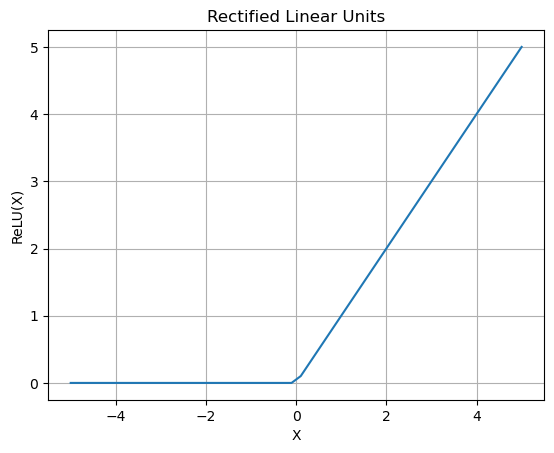

In [57]:
y = list(map(lambda a: a if a>=0 else 0, x))
plot_graph(y,"Rectified Linear Units","ReLU(X)",'-')

## Leaky ReLU

The Leaky ReLU Activation Function (LReLU) is very similar to the ReLU Activation Function with one change. Instead of sending negative values to zero, a very small slope parameter is used, which incorporates some information from negative values.
$$
f(x) =
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    \alpha x       & \quad \text{if } x < 0
  \end{cases} 
$$

where α is a small constant.
This activation function was first introduced by Maas et al. who used a slope parameter of α is 0.01.

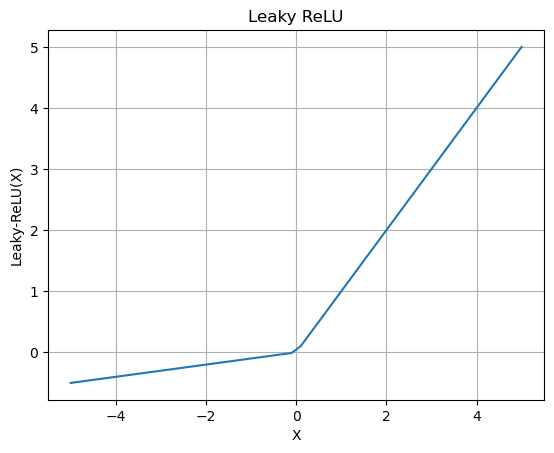

In [58]:
alpha = 0.1

y = list(map(lambda a: a if a>=0 else a*0.1, x))
plot_graph(y,"Leaky ReLU","Leaky-ReLU(X)",'-')

# Parametric ReLU P-RELU
Parametric ReLU (PReLU) is an activation function that is an extension of the popular Rectified Linear Unit (ReLU) activation function. This function is overcomes the limitation of the ReLU activation function. The PReLU activation function introduces a learnable parameter, α, that controls the slope of the negative part of the activation function. The PReLU activation function is defined as:

$$
f(y_{i}) = 
\begin{cases}
    y_{i} & \quad \text{if } y_{i} > 0 \\
    \alpha_{i}y_{i}       & \quad \text{if } y_{i} \leq 0
  \end{cases} 
$$
Here $ y_{i} $ is the input of the nonlinear activation `f` on the `i`th channel, and $\alpha_{i}$ is a coefficient controlling the slope of the negative part. The subscript `i` in $\alpha_{i}$ indicates that we allow the nonlinear activation to vary on different channels. When $\alpha_{i}$= 0, it becomes ReLU; when $\alpha_{i}$ is a learnable parameter, we refer as Parametric ReLU (PReLU). In other words equivalent to $f(y_{i}) = max(0, y_{i}) + \alpha_{i} min(0, y_{i})$.


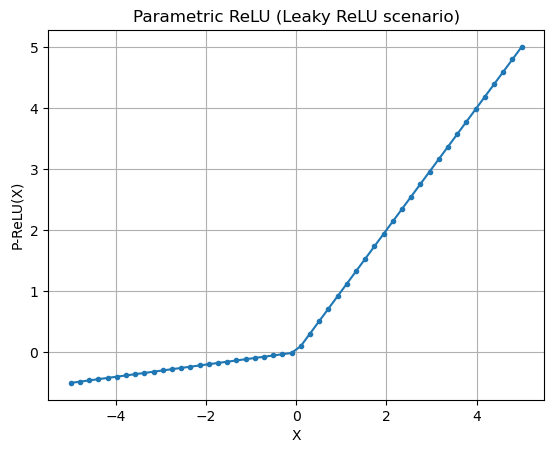

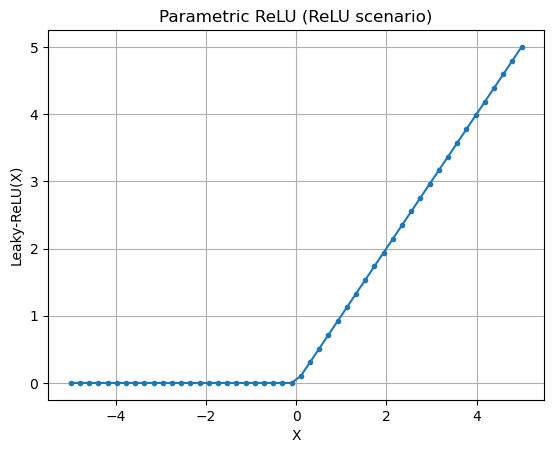

In [59]:
alpha = 0.1

y = list(map(lambda a: a if a>=0 else a*alpha, x))
plot_graph(y,'Parametric ReLU (Leaky ReLU scenario)',"P-ReLU(X)",'.-')
plt.show()

alpha = 0.0

y = list(map(lambda a: a if a>=0 else a*alpha, x))
plot_graph(y,'Parametric ReLU (ReLU scenario)',"Leaky-ReLU(X)",'.-')
plt.show()

# 𝐸𝑥𝑝𝑜𝑛𝑒𝑛𝑡𝑖𝑎𝑙 𝐿𝑖𝑛𝑒𝑎𝑟 𝑈𝑛𝑖𝑡𝑠 (ELU)

The ELU (Exponential Linear Unit) activation function is a type of artificial neuron commonly used in deep learning networks. It is similar to the ReLU (Rectified Linear Unit) activation function, but with an exponential component that makes it more suitable for certain types of problems. The ELU activation function can be written as:
$$
    f(x)=
    \begin{cases}
        x & \text{ if } x \geq 0 \\
        \alpha (e^{x} -1) & \text{ if } x < 0
    \end{cases}
$$

Alpha is a constant value initialized to 1


Most machine learning algorithms work better with zero-centered, normalized features.

Since ELUs can have negative values it pushes the mean of the activations closer to zero. Having mean activations closer to zero also causes the faster learning and convergence.

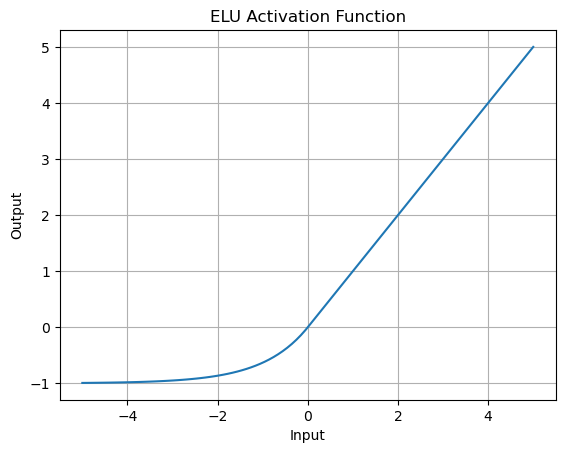

In [60]:

def elu(x, alpha=1.0):
    """ Exponential Linear Unit (ELU) activation function """
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

x = np.linspace(-5, 5, 100)
y = elu(x)

plt.plot(x, y)
plt.title("ELU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

# SELU

The activation function SELU is self-normalizing. It's an offshoot of the European Language Unit. Because of its inherent self-normalizing tendency, SELU guarantees consistent output standardization, which is its primary benefit. As a result, layers for Batch-Normalization are redundant.
The behavior of the SELU activation function may be expressed by the following equation:
$$
f(x)=\begin{cases}
\lambda x & \text{ if } x >0 \\
\lambda \alpha (e^{x}-1) & \text{ if } x \leq 0
\end{cases}
$$

Where λ and α are constants with values
$$
\lambda ≈ 1.0505 \\
\alpha ≈ 1.6732
$$

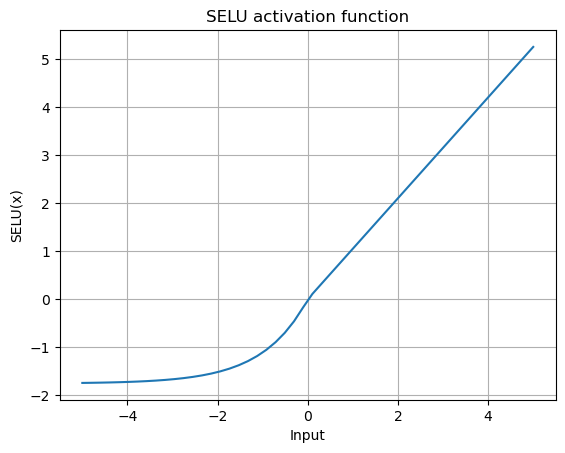

In [61]:
lam = 1.0507
alp = 1.6732

def SELU(x):
    if x > 0:
        return lam*x
    return lam*alp*(np.exp(x) - 1)

x = np.linspace(-5.0, 5.0,50)

y = [SELU(a) for a in x]

plt.plot(x, y)
plt.title("SELU activation function")
plt.xlabel("Input")
plt.ylabel("SELU(x)")
plt.grid(True)